In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
data=pd.read_csv('train.csv (2).zip')

In [73]:
data.shape

(404290, 6)

In [74]:
data.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
250768,250768,364744,364745,Which is better in terms of placements and all...,"Which is better, IIT BHU chemical engineering ...",0
94386,94386,142710,157642,Why even bother to write answers when no one w...,When foreigners make mistakes while speaking E...,0
29155,29155,53976,53977,What are the best music shuffling apps/plugins?,Moderate talkers?,0
156677,156677,44444,132291,How can I increase my penis?,What is the best way to enlarge my penis?,1
52829,52829,93484,93485,Why are backlinks important?,Why and how are backlinks important?,1
258928,258928,374616,374617,Where do physics graduates from Emory attend g...,Why was I rejected from all graduate schools?,0
186773,186773,284810,284811,How can I improve my conversation skills so th...,How do I improve my social skills so that I ca...,1
123689,123689,199920,199921,How can an Indian get job in IT in the USA?,How can an Indian get a job in the USA?,0
388323,388323,235726,51279,What are the best indoor exercises to remove b...,How can I lose belly fat without losing weight?,1
143655,143655,227548,227549,Why didn't Ratan Tata get married?,How can I contact Ratan Tata?,0


In [75]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [77]:
### missing values
data.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [78]:
## duplicate row
data.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<Axes: >

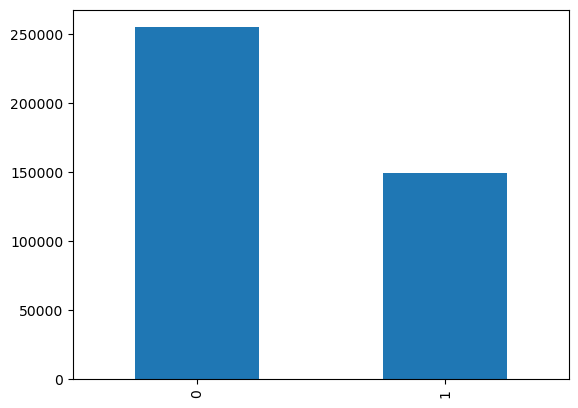

In [79]:
#### Distribution of duplicate and non_duplicate question

print(data['is_duplicate'].value_counts())
print((data['is_duplicate'].value_counts()/data['is_duplicate'].count())*100)
data['is_duplicate'].value_counts().plot(kind='bar')

In [80]:
#### Repeated question

qid=pd.Series(data['qid1'].tolist()+data['qid2'].tolist())
print("Number of unique question" ,np.unique(qid).shape[0])
x=qid.value_counts()>1
print('Number of question getting  repeted',x[x].shape[0])

Number of unique question 537933
Number of question getting  repeted 111780


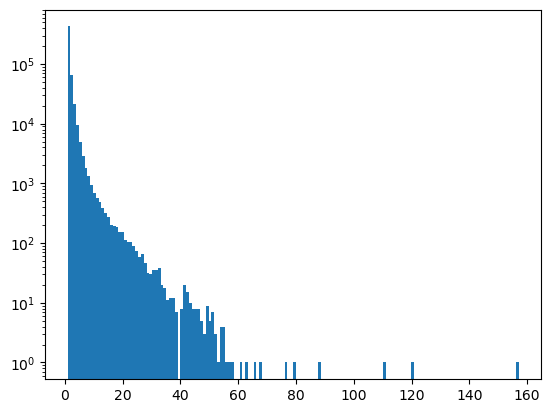

In [81]:
###Repeated question histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [82]:
data.shape

(404290, 6)

In [83]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [111]:
new_data=data.sample(30000)

In [112]:
new_data.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [113]:
new_data.duplicated().sum()

0

In [114]:
ques_data=new_data[['question1','question2']]
ques_data.head()

,question1,question2
241313,"Which country has been the most peaceful, rela...",What is (was) the most peaceful nation in hist...
328843,Can you die in the Bellagio pool?,Who was George Washington's favorite general?
231102,Is it illegal to download Youtube videos in Ge...,Is it illegal to download YouTube videos?
2626,What are the things that you think define you?,"What are the things you think you should do, b..."
74193,How do I log in to Tomcat on a Mac?,How can I log in to Tomcat Manager in a Mac?


In [116]:
from sklearn.feature_extraction.text import CountVectorizer
### merge text
ques_data['question1'].fillna('', inplace=True)
ques_data['question2'].fillna('', inplace=True)

questions=list(ques_data['question1'])+list(ques_data['question2'])

cv=CountVectorizer(max_features=30000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

C:\Users\srava\AppData\Local\Temp\ipykernel_31064\2200429396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_data['question1'].fillna('', inplace=True)
C:\Users\srava\AppData\Local\Temp\ipykernel_31064\2200429396.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_data['question2'].fillna('', inplace=True)


MemoryError: Unable to allocate 11.7 GiB for an array with shape (60000, 26115) and data type int64

In [117]:
temp_data1=pd.DataFrame(q1_arr,index=ques_data.index)
temp_data2=pd.DataFrame(q2_arr,index=ques_data.index)
temp_data=pd.concat([temp_data1,temp_data2],axis=1)
temp_data.shape

(30000, 6000)

In [118]:
temp_data

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
241313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
328843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2626,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
74193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261018,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
48476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
temp_data['is_duplicate'] = new_data['is_duplicate']

In [120]:
temp_data.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
241313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
328843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2626,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
74193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [121]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(temp_data.iloc[:,0:-1].values,temp_data.iloc[:,-1].values,test_size=0.2,random_state=42)

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7376666666666667

In [123]:
from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
accuracy_score(y_test,y_pred)

0.7196666666666667

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [56]:
data=pd.read_csv('train.csv (2).zip')

In [57]:
data.shape

(404290, 6)

In [58]:
 data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [59]:
new_data=data.sample(30000,random_state=2)

In [60]:
new_data.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [61]:
new_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [62]:
new_data.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [63]:
new_data.duplicated().sum()

0

0    19013
1    10987
Name: is_duplicate, dtype: int64
0    63.376667
1    36.623333
Name: is_duplicate, dtype: float64


<Axes: >

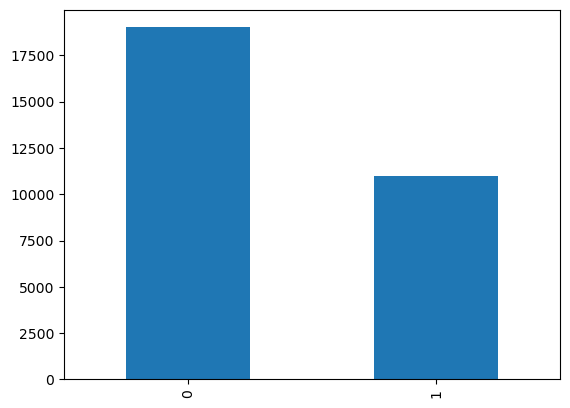

In [64]:
# Distribution of duplicate and non-duplicate questions

print(new_data['is_duplicate'].value_counts())
print((new_data['is_duplicate'].value_counts()/new_data['is_duplicate'].count())*100)
new_data['is_duplicate'].value_counts().plot(kind='bar')

In [81]:
#Repeated questions

qid=pd.Series(new_data['qid1'].tolist()+new_data['qid2'].tolist())
print('NUMber of unique question',np.unique(qid).shape[0])
x=qid.value_counts()>1
print('Number of question getting repeated',x[x].shape[0])


NUMber of unique question 55299
Number of question getting repeated 3480


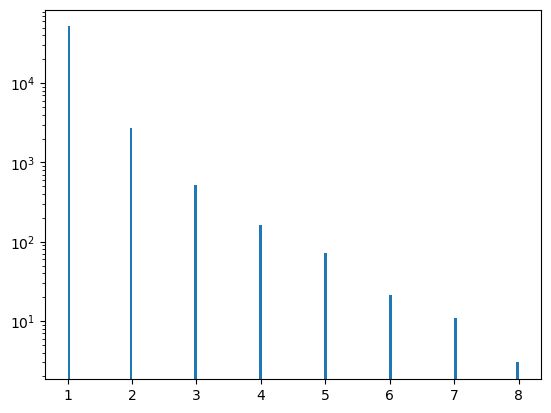

In [82]:
## Repeated question histogram


plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [83]:
### Feature Engineering

new_data['q1_len']=new_data['question1'].str.len()
new_data['q2_len']=new_data['question2'].str.len()


In [84]:
new_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,total_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,13


In [85]:
new_data['q1_num_words']=new_data['question1'].apply(lambda row:len(row.split(" ")))
new_data['q2_num_words']=new_data['question2'].apply(lambda row:len(row.split(" ")))
new_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,total_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,13


In [86]:
def common_words(row):
    w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
    return len(w1&w2)

In [89]:
set(map(lambda word:word.lower().strip(),'i am poor i want become  to invest,'.split("")))

ValueError: empty separator

In [91]:
new_data['word_common']=new_data.apply(common_words,axis=1)
new_data.head()
new_data.shape

(30000, 12)

In [92]:
def total_words(row):
    w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
    return (len(w1)+len(w2))

In [94]:
new_data['total_words']=new_data.apply(total_words,axis=1)
new_data.head()
new_data.shape

(30000, 12)

In [96]:
new_data['word_share']=round(new_data['word_common']/new_data['total_words'],2)
new_data.head()
new_data.shape

(30000, 13)

minimum characters 2
maxmum characters 391
average num of characters 59


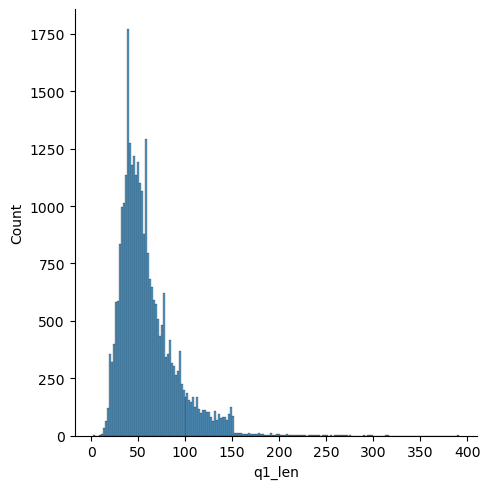

In [97]:
### analysis of features

sns.displot(new_data['q1_len'])
print('minimum characters',new_data['q1_len'].min())
print('maxmum characters',new_data['q1_len'].max())
print('average num of characters',int(new_data['q1_len'].mean()))

minimum characters 6
maxmum characters 1151
average num of characters 60


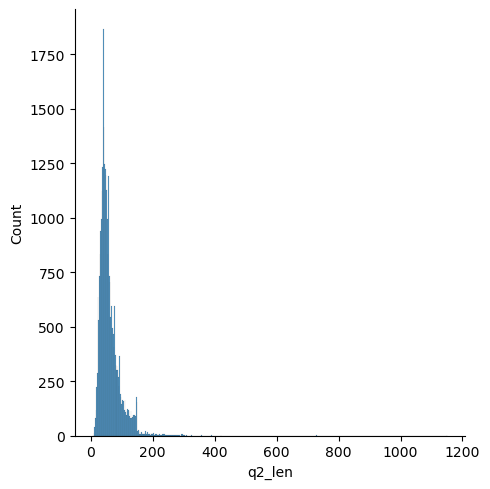

In [98]:
sns.displot(new_data['q2_len'])
print('minimum characters',new_data['q2_len'].min())
print('maxmum characters',new_data['q2_len'].max())
print('average num of characters',int(new_data['q2_len'].mean()))

minimum characters 1
maxmum characters 72
average num of characters 10


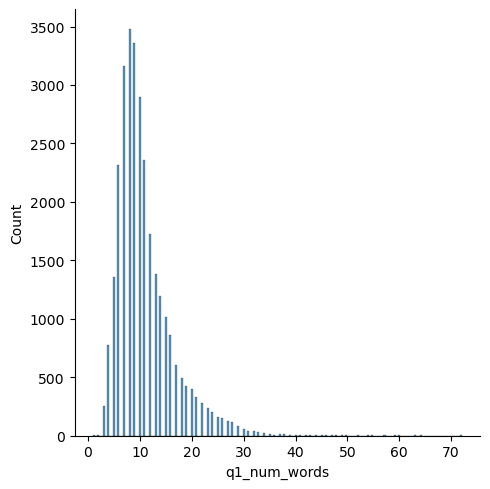

In [99]:
sns.displot(new_data['q1_num_words'])
print('minimum characters',new_data['q1_num_words'].min())
print('maxmum characters',new_data['q1_num_words'].max())
print('average num of characters',int(new_data['q1_num_words'].mean()))

minimum characters 1
maxmum characters 237
average num of characters 11


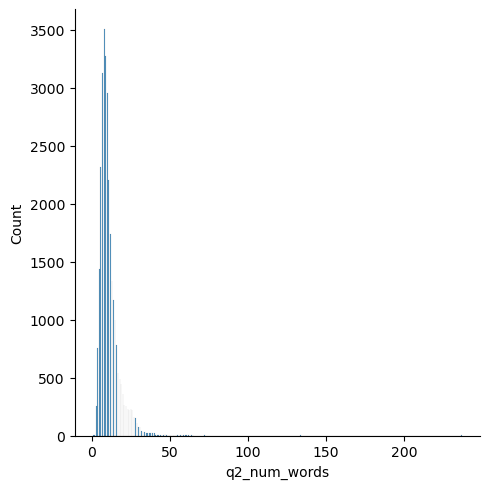

In [100]:
sns.displot(new_data['q2_num_words'])
print('minimum characters',new_data['q2_num_words'].min())
print('maxmum characters',new_data['q2_num_words'].max())
print('average num of characters',int(new_data['q2_num_words'].mean()))

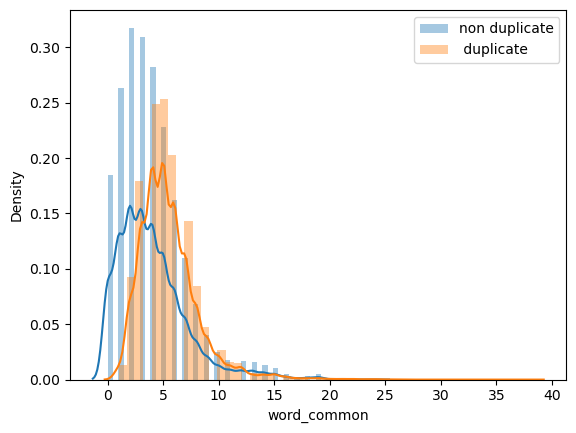

In [101]:
##### common words

sns.distplot(new_data[new_data['is_duplicate']==0]['word_common'],label='non duplicate')

sns.distplot(new_data[new_data['is_duplicate']==1]['word_common'],label=' duplicate')
plt.legend()
plt.show()

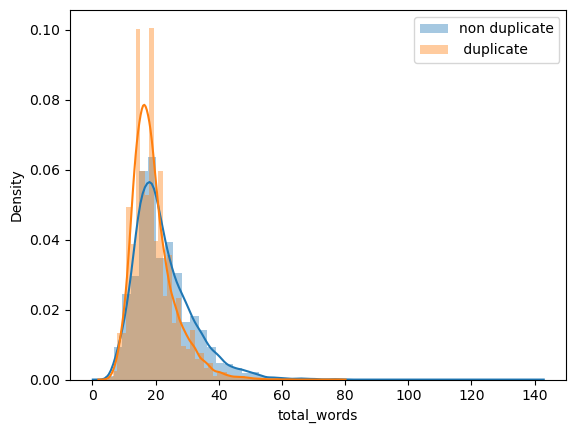

In [102]:
#### TOTAL WORDS
sns.distplot(new_data[new_data['is_duplicate']==0]['total_words'],label='non duplicate')

sns.distplot(new_data[new_data['is_duplicate']==1]['total_words'],label=' duplicate')
plt.legend()
plt.show()

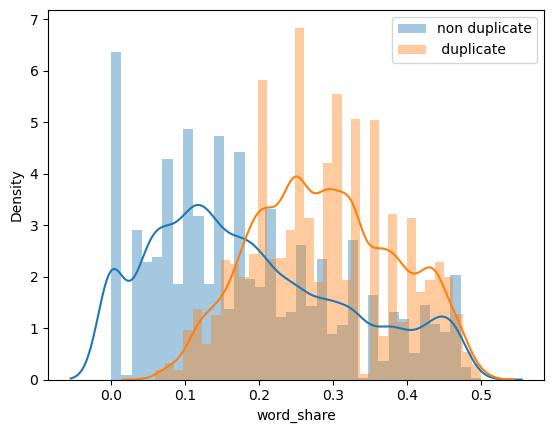

In [103]:
# WORD sHARE
sns.distplot(new_data[new_data['is_duplicate']==0]['word_share'],label='non duplicate')

sns.distplot(new_data[new_data['is_duplicate']==1]['word_share'],label=' duplicate')
plt.legend()
plt.show()

In [104]:
ques_data=new_data[['question1',"question2"]]
ques_data.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [105]:
final_data=new_data.drop(columns=["id","qid1","qid2","question1","question2"])
print(final_data.shape)
final_data.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,total_words,word_common,word_share
398782,1,76,77,12,12,24,11,0.46
115086,0,49,57,12,15,23,7,0.30
327711,0,105,120,25,17,34,2,0.06
367788,0,59,146,12,30,32,0,0.00
151235,0,35,50,5,9,13,3,0.23


In [108]:
 from sklearn.feature_extraction.text import CountVectorizer
    ## merge text
questions=list(ques_data['question1'])+list(ques_data['question2'])
cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [112]:
tem_data1=pd.DataFrame(q1_arr,index=ques_data.index)
tem_data2=pd.DataFrame(q2_arr,index=ques_data.index)
tem_data=pd.concat([tem_data1,tem_data2],axis=1)
tem_data.shape

(30000, 6000)

In [114]:
final_data=pd.concat([final_data,tem_data],axis=1)
print(final_data.shape)
final_data.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,total_words,word_common,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,24,11,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,23,7,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,34,2,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,32,0,0.00,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,35,50,5,9,13,3,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(final_data.iloc[:,1:].values,final_data.iloc[:,0].values,test_size=0.2,random_state=42)

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)


0.7678333333333334

In [117]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
accuracy_score(y_test,y_pred)

0.764

In [ ]:
Adv###advanced Features
1. Token Features
cwc_min: This is the ratio of the number of common words to the length of the smaller question
cwc_max: This is the ratio of the number of common words to the length of the larger question
csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions
ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions
ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions
last_word_eq: 1 if the last word in the two questions is same, 0 otherwise
first_word_eq: 1 if the first word in the two questions is same, 0 otherwise


In [ ]:
2. ##Length Based Features
mean_len: Mean of the length of the two questions (number of words)
abs_len_diff: Absolute difference between the length of the two questions (number of words)
longest_substr_ratio: Ratio of the length of the longest

In [ ]:
##Fuzzy Features
fuzz_ratio: fuzz_ratio score from fuzzywuzzy
fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy
token_sort_ratio: token_sort_ratio from fuzzywuzz
token_set_ratio: token_set_ratio from fuzzywuzzy
 

In [ ]:
##### bow _with_preprocessing _and _advanced_features 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('train.csv (2).zip')

In [3]:
new_data=data.sample(30000,random_state=2)

In [4]:
new_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [5]:
new_data.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [6]:
def preprocess(q):
    
    q=str(q).lower().strip()
    #### replace certain special characters with their string equivalents
    q=q.replace("%", 'precent')
    q=q.replace("$", 'dollar')
    q=q.replace("@", 'at')
 
    
    ## the patter '[math]'appears around 900 time in the whole dataset
    q=q.replace(['maths'],"")
    
    
    ### replacing some number with string equivalent ( not perfect ,can be done better to account for more case)
    q=q.replace(",000,000,000", 'b')
    q=q.replace(",000,000", 'm')
    q=q.replace(",000", 'k')
    q=re.sub(r'([0-9]+)000000000',r'\1b',q)
    q=re.sub(r'([0-9]+)000000',r'\1m',q)
    q=re.sub(r'([0-9]+)000',r'\1k',q)
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

In [7]:
from bs4 import BeautifulSoup  # Assuming you have BeautifulSoup for HTML parsing
import re

In [8]:
preprocess("I've already! wasn't <b>done</b>?")

TypeError: replace() argument 1 must be str, not list

In [9]:
new_data['question1'] = new_data['question1'].apply(preprocess)
new_data['question2'] = new_data['question2'].apply(preprocess)

TypeError: replace() argument 1 must be str, not list

In [ ]:
new_data.head()

In [ ]:
new_data["q1_len"]=new_data['question1'].str.len()
new_data["q2_len"]=new_data['question2'].str.len()

In [ ]:
new_data['q1_num_words']=new_data['question1'].apply (lambda row:len(row.split(" ")))
new_data['q2_num_words']=new_data['question2'].apply (lambda row:len(row.split(" ")))
new_data.head()

In [10]:
def common_words(row):
    w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
    return len(w1 & w2)

In [11]:
new_data['words_common']=new_data.apply(common_words,axis=1)
new_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,words_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,3


In [12]:
def total_words(row):
    w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [13]:
new_data['word_total']=new_data.apply(total_words,axis=1)
new_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,words_common,word_total
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,3,13


In [14]:
new_data['word_share']=round(new_data['words_common']/new_data['word_total'],2)
new_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,words_common,word_total,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,7,23,0.30
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,2,34,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,3,13,0.23


In [15]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [17]:
token_features = new_data.apply(fetch_token_features, axis=1)

new_data["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_data["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_data["csc_min"]       = list(map(lambda x: x[2], token_features))
new_data["csc_max"]       = list(map(lambda x: x[3], token_features))
new_data["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_data["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_data["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_data["first_word_eq"] = list(map(lambda x: x[7], token_features))


In [18]:
new_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,words_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,11,24,0.46,0.874989,0.874989,0.999975,0.999975,0.916659,0.916659,1,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,7,23,0.30,0.833319,0.714276,0.499988,0.333328,0.583328,0.466664,1,1
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,2,34,0.06,0.000000,0.000000,0.499988,0.285710,0.117646,0.080000,0,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,0,32,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,3,13,0.23,0.749981,0.499992,0.000000,0.000000,0.599988,0.333330,1,0


In [23]:
import distance

ModuleNotFoundError: No module named 'distance'

In [24]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    ### converting the sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

ModuleNotFoundError: No module named 'distance'

In [25]:
length_features = new_data.apply(fetch_length_features, axis=1)

new_data['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_data['mean_len'] = list(map(lambda x: x[1], length_features))
new_data['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

NameError: name 'fetch_length_features' is not defined